# Simplify GPS tracks

<br/>
<div class="alert alert-block alert-warning" style="padding:1em">
<b>Simplifaction:</b> this operation consists to reduce the number of observations in track (while preserving time stamps and other information) to make it less bulky or more readable on a graphic.</div>

We present, on this web page, 2 simplification methods applying to a track: Douglas & Peucker algorithm and Visvalingram simplification algorithm.

The process "Track simplification" generally returns a new simplified track. Tolerance is in the unit of track observation coordinates.

## Let's start by defining our environment

This task is only useful for the online notebook

In [1]:
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tracklib as trk

## Simplifaction with Douglas-Peucker method

The Douglas-Peucker algorithm reduce the number of a line by reducing the number of points. 
The result should keep the original shape.

<div class="alert alert-block alert-info">
<b>Reference:</b><br/>David Douglas, Thomas Peucker: Algorithms for the
        reduction of the number of points required to represent a digitized
        line or its caricature. In Cartographica: The International Journal
        for Geographic Information and Geovisualization.
        Volume 10, Issue 2, Pages 112–122, 1973, <a href='https://utpjournals.press/doi/10.3138/FM57-6770-U75U-7727'>https://utpjournals.press/doi/10.3138/FM57-6770-U75U-7727</a></div>

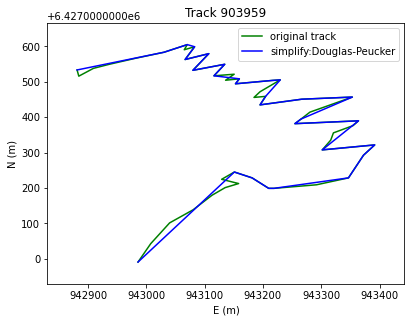

In [2]:
import matplotlib.pyplot as plt

# Loading the geometry
chemin = '../../../data/lacet/ecrins.csv'
param = trk.TrackFormat({'ext': 'WKT', 
                        'id_wkt': 0, 
                        'separator': ',', 
                        'srid': 'ENU',
                        'doublequote': True,
                         'header': 1,
                         'id_user': 1,
                         'id_track': 2
}) 
tracks = trk.TrackReader.readFromFile(chemin, param)
trace = tracks["903959","%"][0]
trace = trace.extract(70,120)

# Simplification with Douglas-Peucker
tolerance = 25
trace2 = trk.simplify(trace, tolerance, trk.MODE_SIMPLIFY_DOUGLAS_PEUCKER)
trace.plot(append = False, sym='g-')
trace2.plot(append = True, sym='b-')

plt.legend(["original track", "simplify:Douglas-Peucker"])

## Simplification with Visvalingram method

The Visvalingram algorithm simplify the geometry of the track by reducing
the number of points but the result presents less angular results than
the Douglas-Peucker algorithm.

<div class="alert alert-block alert-info">
<b>Reference:</b><br/>M. Visvalingam & J. D. Whyatt (1993) Line generalisation by repeated elimination of points, 
    The Cartographic Journal, 30:1, 46-51, DOI:
    <a href='https://doi.org/10.1179/000870493786962263'>10.1179/000870493786962263</a></div>

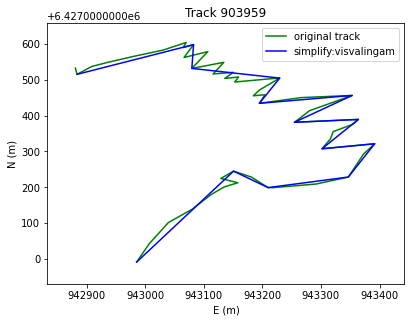

In [3]:
import matplotlib.pyplot as plt

# Loading the geometry
chemin = '../../../data/lacet/ecrins.csv'
param = trk.TrackFormat({'ext': 'WKT', 
                        'id_wkt': 0, 
                        'separator': ',', 
                        'srid': 'ENU',
                        'doublequote': True,
                         'header': 1,
                         'id_user': 1,
                         'id_track': 1
}) 
tracks = trk.TrackReader.readFromFile(chemin, param)
trace = tracks["903959","%"][0]
trace = trace.extract(70,120)

# Simplification with Visvalingram
tolerance = 50
trace3 = trk.simplify(trace, tolerance, trk.MODE_SIMPLIFY_VISVALINGAM)
trace.plot(append = False, sym='g-')
trace3.plot(append = True, sym='b-')
plt.legend(['original track', 'simplify:visvalingam'])

## Graphical Abstract

[]

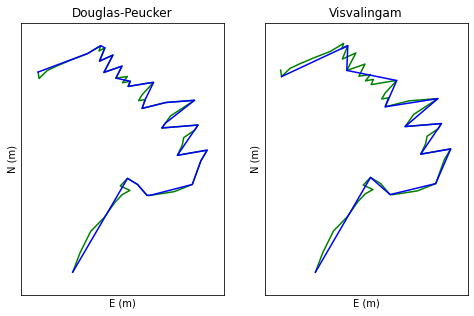

In [4]:
plt.figure(figsize=(8, 5))

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
trace.plot(sym='g-', append=ax1)
trace2.plot(sym='b-', append=ax1)
ax1.set_title('Douglas-Peucker')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
trace.plot(sym='g-', append=ax2)
trace3.plot(sym='b-', append=ax2)
ax2.set_title('Visvalingam')
ax2.set_xticks([])
ax2.set_yticks([])